In [1]:
import numpy as np 
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import torchvision
import shutil
import cv2
import matplotlib.pylab as plt
from PIL import Image
from google.colab.patches import cv2_imshow



In [ ]:
!pip install tensorflow-gpu


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!nvcc --version
!cat /usr/local/cuda/include/cudnn_version.h

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
cat: /usr/local/cuda/include/cudnn_version.h: No such file or directory


# Import the data


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#It is the dataset of brain tumors with first and second-order features from the image.
#This is a brain tumor feature dataset including five first-order features and eight texture features with the target level (in the column Class).
Brain_Tumor = pd.read_csv('/content/drive/MyDrive/MRI/Brain Tumor.csv')
#It is the dataset of brain tumor with first and second order features with feature assessment paramenters.
bt = pd.read_csv('/content/drive/MyDrive/MRI/bt_dataset_t3.csv')


# Data overview


In [4]:
Brain_Tumor

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,Image3758,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3758,Image3759,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3759,Image3760,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3760,Image3761,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155


In [ ]:
Brain_Tumor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 441.0

In [ ]:
bt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1644 entries, 0 to 1643
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               1644 non-null   object 
 1   Mean                1644 non-null   float64
 2   Variance            1644 non-null   float64
 3   Standard Deviation  1644 non-null   float64
 4   Entropy             1644 non-null   float64
 5   Skewness            1275 non-null   float64
 6   Kurtosis            1275 non-null   float64
 7   Contrast            1644 non-null   float64
 8   Energy              1644 non-null   float64
 9   ASM                 1644 non-null   float64
 10  Homogeneity         1644 non-null   float64
 11  Dissimilarity       1644 non-null   float64
 12  Correlation         1644 non-null   float64
 13  Coarseness          1644 non-null   float64
 14  PSNR                1644 non-null   float64
 15  SSIM                1275 non-null   float64
 16  MSE   

In [ ]:
#ONLY RUN ONCE

# os.mkdir("/content/drive/MyDrive/MRI/data")
# os.mkdir("/content/drive/MyDrive/MRI/data/Tumor")
# os.mkdir("/content/drive/MyDrive/MRI/data/non-Tumor")

# for i in range(Brain_Tumor.shape[0]):
#     name = Brain_Tumor["Image"].iloc[i]
#     if Brain_Tumor["Class"].iloc[i] == 0:
#         shutil.copy2("/content/drive/MyDrive/MRI/Brain Tumor/"+str(name + ".jpg"), "/content/drive/MyDrive/MRI/data/non-Tumor")
#     else:
#         shutil.copy2("/content/drive/MyDrive/MRI/Brain Tumor/"+str(name + ".jpg"), "/content/drive/MyDrive/MRI/data/Tumor")

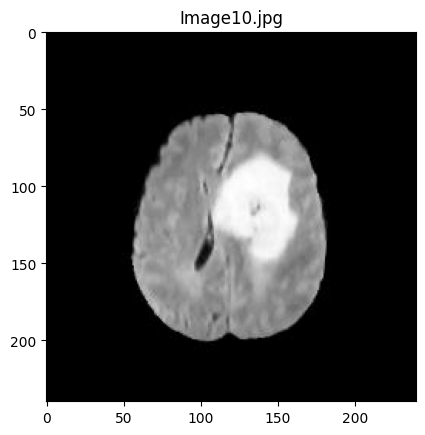

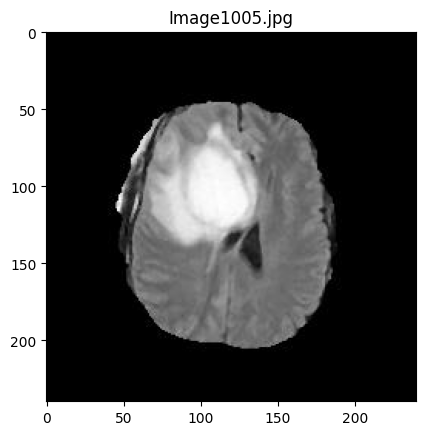

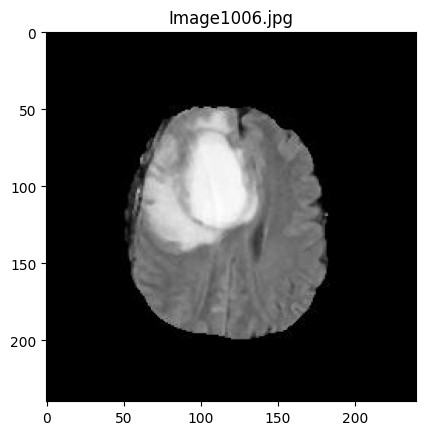

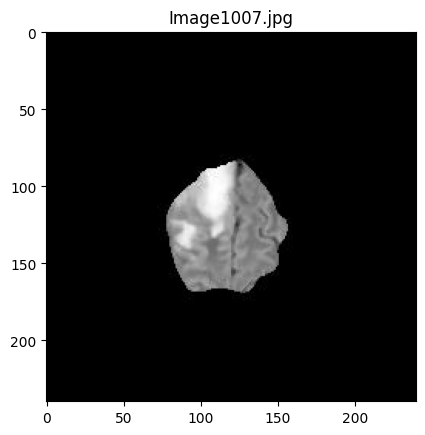

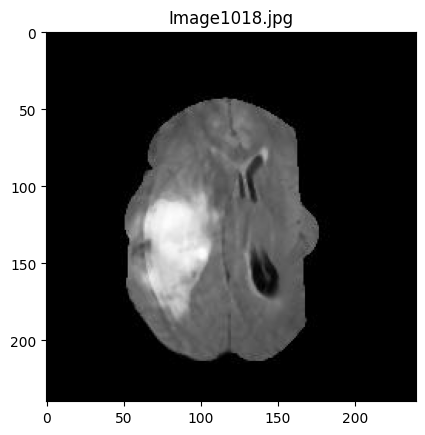

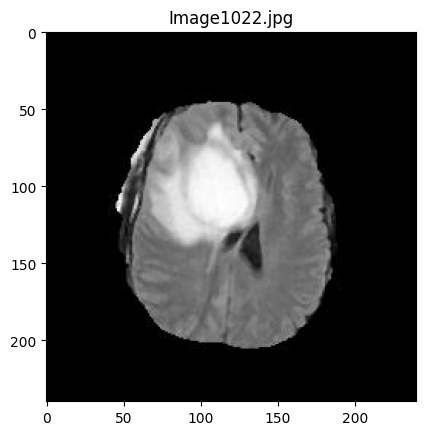

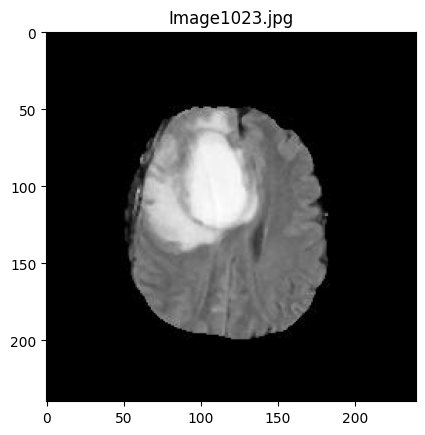

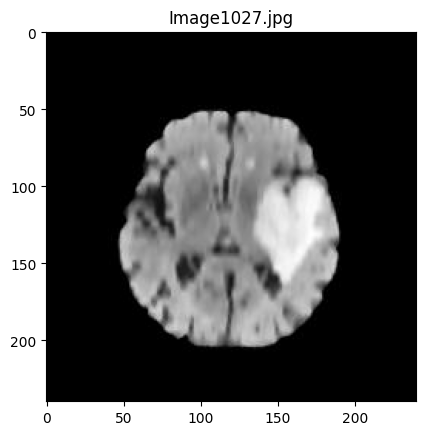

In [18]:
import os
import torchvision.io
import matplotlib.pyplot as plt

image_directory = '/content/drive/MyDrive/MRI/data/Tumor/'
image_files = os.listdir(image_directory)
image_files.sort()

# Read and plot the first 8 images(have Tumor)
for i in range(8):
    image_file = image_files[i]
    image_path = os.path.join(image_directory, image_file)
    img = torchvision.io.read_image(image_path)
    plt.figure()
    plt.imshow(img.permute((1, 2, 0)))
    plt.title(f"{image_file}")

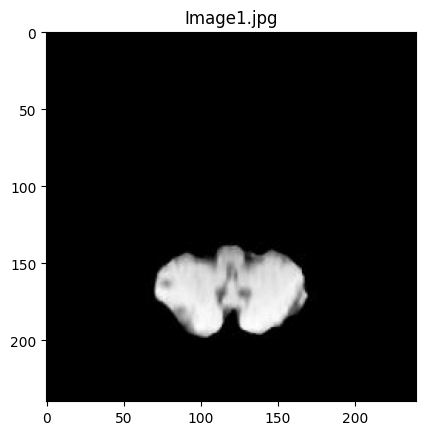

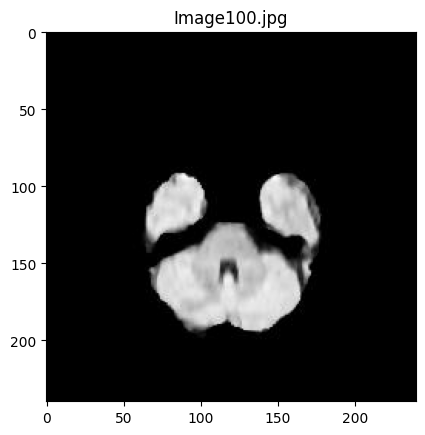

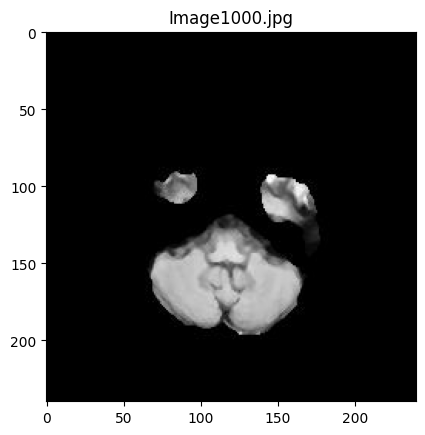

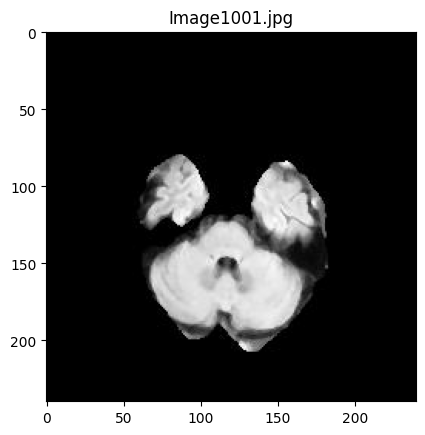

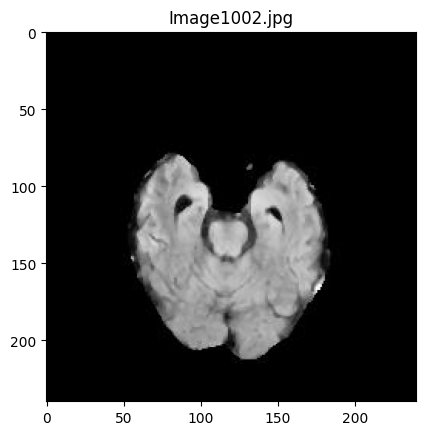

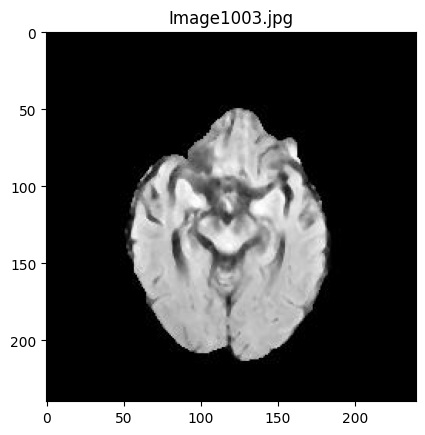

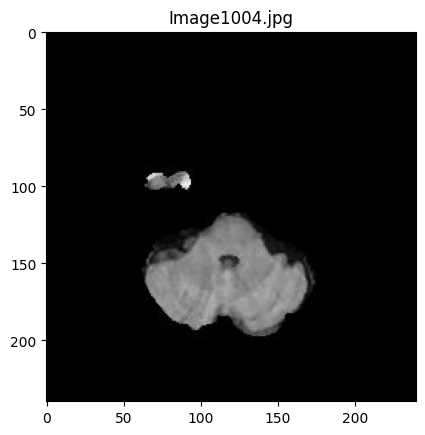

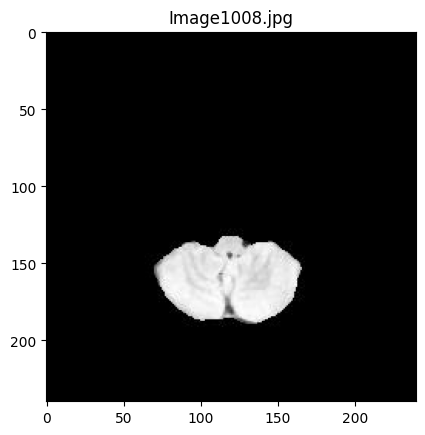

In [19]:
import os
import torchvision.io
import matplotlib.pyplot as plt

image_directory = '/content/drive/MyDrive/MRI/data/non-Tumor/'
image_files = os.listdir(image_directory)
image_files.sort()

# Read and plot the first 8 images(without Tumor)
for i in range(8):
    image_file = image_files[i]
    image_path = os.path.join(image_directory, image_file)
    img = torchvision.io.read_image(image_path)
    plt.figure()
    plt.imshow(img.permute((1, 2, 0)))
    plt.title(f"{image_file}")

# Model （EfficientNetB0 Based, transfer learning）

In [ ]:
import os
import random
import shutil

data_dir = '/content/drive/MyDrive/MRI/data'
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')
test_dir = os.path.join(data_dir, 'test')

##ONLY RUN ONCE
## Create a directories
# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(val_dir, exist_ok=True)
# os.makedirs(test_dir, exist_ok=True)



# Separate the images of tumors and non-tumors into different folders.
tumor_dir = os.path.join(data_dir, 'Tumor')
non_tumor_dir = os.path.join(data_dir, 'non-Tumor')
train_tumor_dir = os.path.join(train_dir, 'Tumor')
train_non_tumor_dir = os.path.join(train_dir, 'non-Tumor')
val_tumor_dir = os.path.join(val_dir, 'Tumor')
val_non_tumor_dir = os.path.join(val_dir, 'non-Tumor')
test_tumor_dir = os.path.join(test_dir, 'Tumor')
test_non_tumor_dir = os.path.join(test_dir, 'non-Tumor')



##ONLY RUN ONCE
# for dir_path in [train_tumor_dir, train_non_tumor_dir, val_tumor_dir, val_non_tumor_dir, test_tumor_dir, test_non_tumor_dir]:
#     os.makedirs(dir_path, exist_ok=True)

# # for traning, validation and testing sets
# for root_dir, subdirs, files in os.walk(tumor_dir):
#     for file in files:
#         src_path = os.path.join(root_dir, file)
#         if random.random() < 0.7: # 70%for training
#             dst_path = os.path.join(train_tumor_dir, file)
#         elif random.random() < 0.8: # 10%for validation
#             dst_path = os.path.join(val_tumor_dir, file)
#         else: # 20%for valiadation
#             dst_path = os.path.join(test_tumor_dir, file)
#         shutil.copy(src_path, dst_path)

# for root_dir, subdirs, files in os.walk(non_tumor_dir):
#     for file in files:
#         src_path = os.path.join(root_dir, file)
#         if random.random() < 0.7: # 70%for traning
#             dst_path = os.path.join(train_non_tumor_dir, file)
#         elif random.random() < 0.8: # 10%for validation
#             dst_path = os.path.join(val_non_tumor_dir, file)
#         else: # 20%for testing
#             dst_path = os.path.join(test_non_tumor_dir, file)
#         shutil.copy(src_path, dst_path)

In [ ]:
! pip install efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 7.5 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from efficientnet.tfkeras import EfficientNetB0

physical_devices = tf.config.list_physical_devices('GPU') # try to use GPU
tf.config.experimental.set_memory_growth(physical_devices[0], True)
data_dir = '/content/drive/MyDrive/MRI/data'
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')
test_dir = os.path.join(data_dir, 'test')

batch_size = 32
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    dtype='float32')#Set the parameter dtype to float32 to take full advantage of the computing power of the GPU

test_datagen = ImageDataGenerator(rescale=1./255, dtype='float32')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True) # Shuffle the sequence in the training set

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary')

# Load the EfficientNetB0 model
base_model = EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Model fine-tuning
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Freeze the first few layers of the pre-training model
for layer in base_model.layers[:-10]:
    layer.trainable = False

# Model compilation
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Set the callback function
checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, mode='min', verbose=1)

# training
history = model.fit(train_generator, steps_per_epoch=train_generator.n//batch_size, epochs=50, 
                    validation_data=validation_generator, validation_steps=validation_generator.n//batch_size, 
                    #class_weight={0: 1, 1: 2}, # Set category weight so that the weight of category 0 is 1 and that of category 1 is 2
                    callbacks=[checkpoint, reduce_lr],
                    #When the fit function is called, the parameters workers and use_multiprocessing are added to enable parallel computing
                    workers=4,
                    use_multiprocessing=True)
#evaluation
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(224, 224), batch_size=batch_size, class_mode='binary')
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.n//batch_size)
print('Test accuracy:', test_acc)

#prediction
prediction_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(224, 224), batch_size=1, class_mode='binary', shuffle=False)
predictions = model.predict(prediction_generator, steps=prediction_generator.n)


Found 2602 images belonging to 2 classes.
Found 939 images belonging to 2 classes.
16804768/16804768 [==============================] - 0s 0us/step
Epoch 1/50
81/81 [==============================] - ETA: 0s - loss: 2.1044 - accuracy: 0.8202
Epoch 1: val_loss improved from inf to 0.37113, saving model to model.h5
81/81 [==============================] - 477s 6s/step - loss: 2.1044 - accuracy: 0.8202 - val_loss: 0.3711 - val_accuracy: 0.8524 - lr: 0.0010
Epoch 2/50
81/81 [==============================] - ETA: 0s - loss: 0.4058 - accuracy: 0.8716
Epoch 2: val_loss improved from 0.37113 to 0.27383, saving model to model.h5
81/81 [==============================] - 50s 596ms/step - loss: 0.4058 - accuracy: 0.8716 - val_loss: 0.2738 - val_accuracy: 0.8955 - lr: 0.0010
Epoch 3/50
81/81 [==============================] - ETA: 0s - loss: 0.3905 - accuracy: 0.8770
Epoch 3: val_loss did not improve from 0.27383
81/81 [==============================] - 46s 556ms/step - loss: 0.3905 - accuracy: 0.

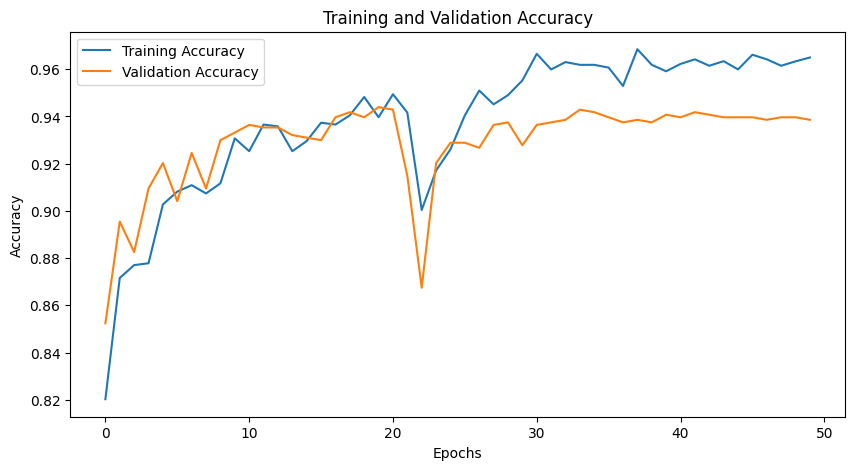

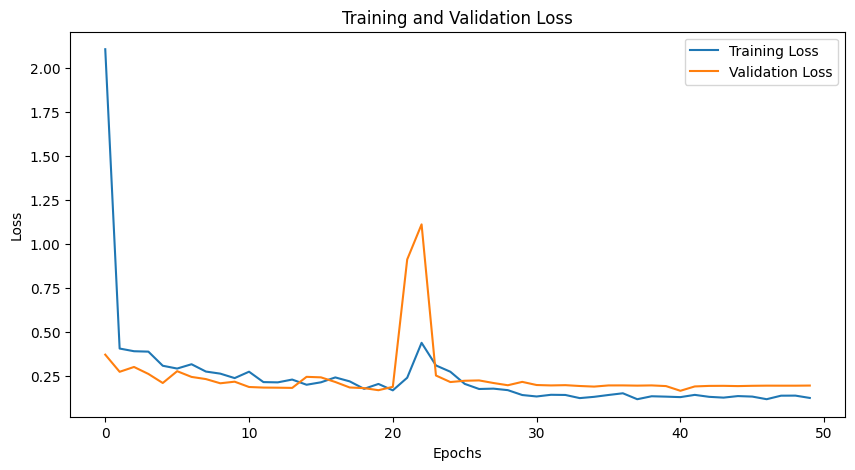

In [ ]:
import matplotlib.pyplot as plt

# Get the training and validation accuracy and loss from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot 1
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot 2
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
history

In [ ]:
model.save('model_4_24.h5')